# Classifying Heart Disease Patients

## Overview

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.

## Dataset Attributes

* **Age (age in years)**
* **Sex:** (1 = male; 0 = female)
* **CP:** (chest pain type)
* **TRESTBPS:** (resting blood pressure (in mm Hg on admission to the hospital))
* **CHOL:** (serum cholestoral in mg/dl)
* **FPS:** (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* **RESTECH:** (resting electrocardiographic results)
* **THALACH:** (maximum heart rate achieved)
* **EXANG:** (exercise induced angina (1 = yes; 0 = no))
* **OLDPEAK:** (ST depression induced by exercise relative to rest)
* **SLOPE:** (the slope of the peak exercise ST segment)
* **CA:** (number of major vessels (0-3) colored by flourosopy)
* **THAL:** (3 = normal; 6 = fixed defect; 7 = reversable defect)
* **TARGET:** (1 or 0)

![](https://i.imgur.com/xUCDwgw.png)

## Importing the Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Loading  the Dataset

In [2]:
df = pd.read_csv('heart.csv')

## Exploring the Data

In [3]:
# head
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# tail
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
# structure of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
# summary statistics of the dataset for integer variables
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
# dimensions of the dataset
df.shape

(303, 14)

## Checking Missing Values

In [8]:
# checking the missing values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Exploratory Data Analysis

### 1. Sex

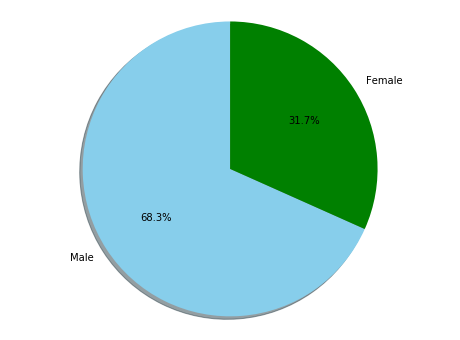

In [9]:
# total number of males and females
male = len(df[df['sex'] == 1])
female = len(df[df['sex'] == 0])

plt.figure(figsize = (8,6))

# data to plot
labels = 'Male','Female'
sizes = [male,female]
colors = ['skyblue','green']
explode = (0,0) # explode first slice

# Plot
plt.pie(sizes, labels = labels, colors = colors, explode =  explode, shadow = True, autopct = '%1.1f%%', startangle = 90)
plt.axis('equal')
plt.show()

### 2. Chest Pain Type

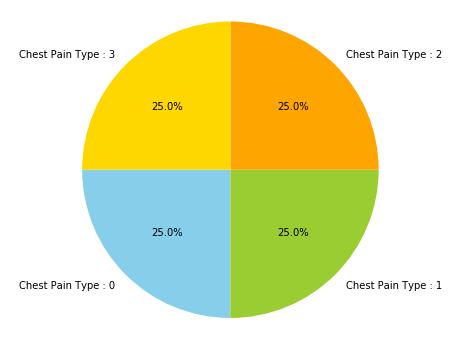

In [10]:
plt.figure(figsize = (8,6))

# Data to Plot
labels = 'Chest Pain Type : 0','Chest Pain Type : 1','Chest Pain Type : 2','Chest Pain Type : 3'
sizes = [len([df['cp']==0]),len([df['cp']==1]),len([df['cp']==2]),len([df['cp']==3])]
colors = ['skyblue', 'yellowgreen','orange','gold']
explode = (0,0,0,0) # explode 1st slice

# Plot
plt.pie( sizes, labels = labels, colors = colors, explode = explode, autopct = '%1.1f%%', startangle = 180 )
plt.axis('equal')
plt.show()

### 3. fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

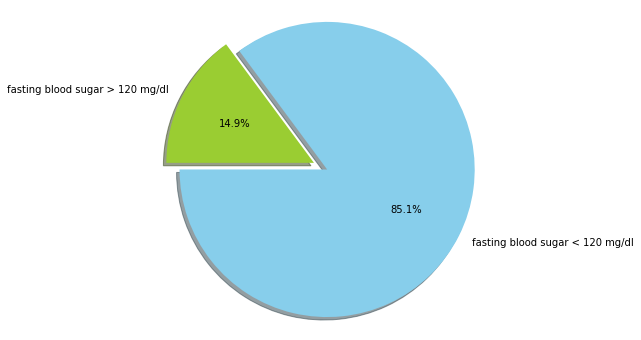

In [11]:
plt.figure(figsize = (8,6))

# data to plot
labels = 'fasting blood sugar < 120 mg/dl','fasting blood sugar > 120 mg/dl'
sizes = [len(df[df['fbs']==0]),len(df[df['fbs']==1])]
colors = ['skyblue','yellowgreen']
explode = [0.1,0]

# Plot
plt.pie(sizes, labels = labels, colors = colors, explode = explode, startangle = 180, shadow = True, autopct = '%1.1f%%')
plt.axis('equal')
plt.show()

### 4. exgang: Exercise induced angina (1 =yes ; 0 = no)

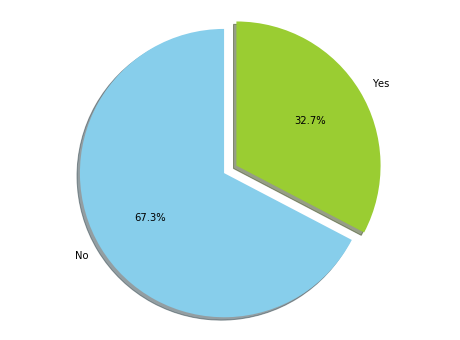

In [12]:
plt.figure(figsize=(8,6))

# Data to plot
labels = 'No','Yes'
sizes = [len(df[df['exang'] == 0]),len(df[df['exang'] == 1])]
colors = ['skyblue', 'yellowgreen']
explode = (0.1, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.show()

### 5. Target : have heart diesease or not (1 = yes, 0 = no )

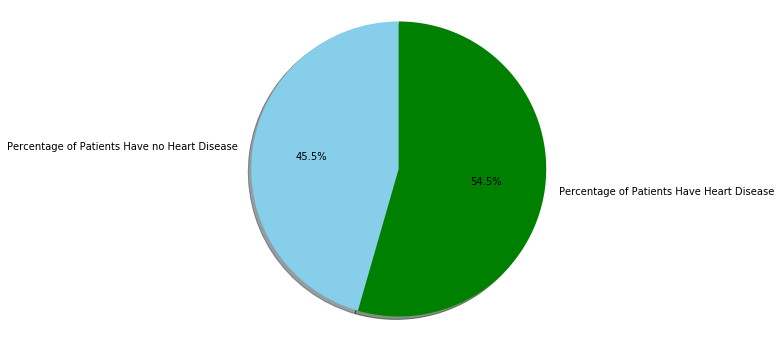

In [13]:
# total number of males and females
CountNoDisease = len(df[df.target == 0])
CountDisease = len(df[df.target == 1])

plt.figure(figsize = (8,6))

# data to plot
labels = 'Percentage of Patients Have no Heart Disease','Percentage of Patients Have Heart Disease'
sizes = [CountNoDisease,CountDisease]
colors = ['skyblue','green']
explode = (0,0) # explode first slice

# Plot
plt.pie(sizes, labels = labels, colors = colors, explode =  explode, shadow = True, autopct = '%1.1f%%', startangle = 90)
plt.axis('equal')
plt.show()

### Plotting the distribution of different attributes

In [14]:
sns.set_style('whitegrid')

### 1.  thalach: maximum heart rate achieved

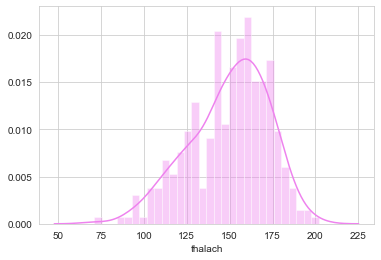

In [15]:
sns.distplot(df['thalach'], kde = True, bins = 30, color = 'violet')
plt.show()

### 2. chol: serum cholestoral in mg/dl

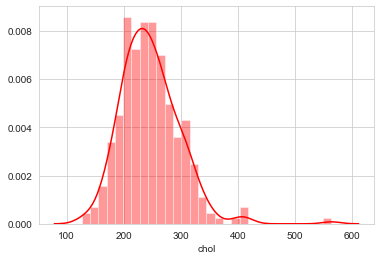

In [16]:
sns.distplot(df['chol'],kde=True,bins=30,color='red')
plt.show()

### 3. trestbps: resting blood pressure (in mm Hg on admission to the hospital)

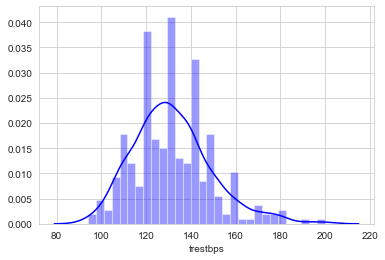

In [17]:
sns.distplot(df['trestbps'],kde=True,bins=30,color='blue')
plt.show()

### 4.  Number of people who have heart disease according to age

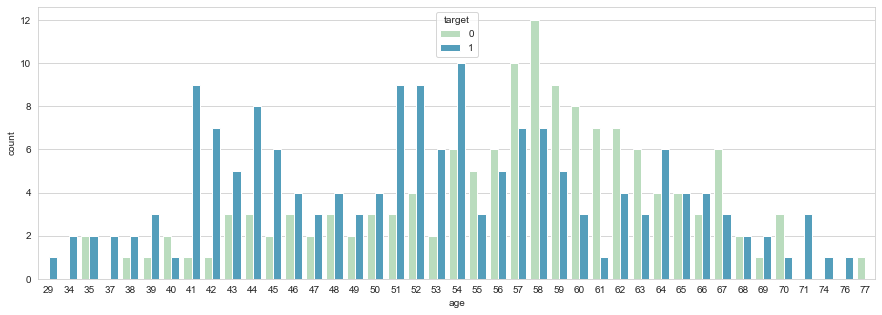

In [18]:
plt.figure(figsize=(15,5))
sns.countplot(x='age', hue = 'target', data = df, palette='GnBu')
plt.show()

### 5. Scatterplot for thalach vs. chol 

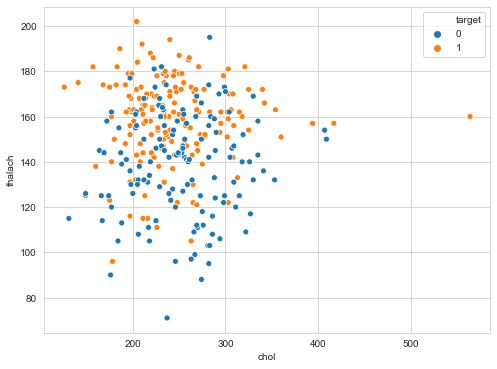

In [19]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='chol',y='thalach',hue='target',data=df)
plt.show()

### 6. .Scatterplot for thalach vs. trestbps

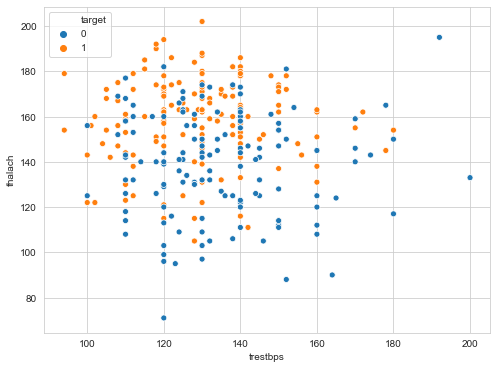

In [20]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='trestbps',y='thalach',data=df,hue='target')
plt.show()

### 7. Target

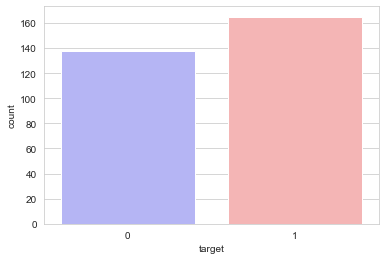

In [21]:
sns.countplot(x = 'target', data = df, palette = 'bwr')
plt.show()

### 8. Heart Disease Frequency for Sex

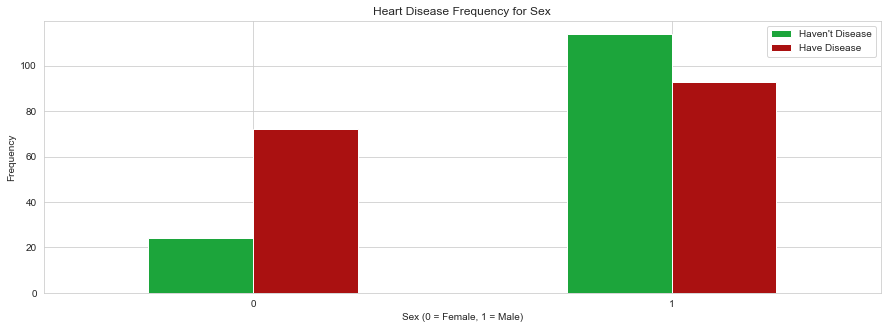

In [22]:
pd.crosstab(df.sex,df.target).plot(kind = 'bar', figsize = (15,5), color = ['#1CA53B','#AA1111'])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

### 9. Heart Disease frequency for Slope

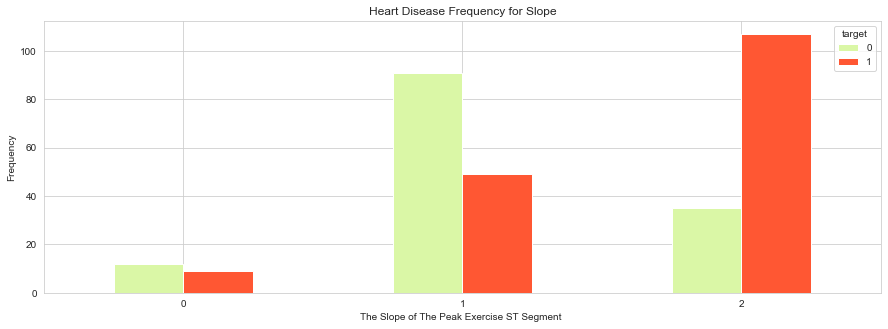

In [23]:
pd.crosstab(df.slope,df.target).plot(kind="bar",figsize=(15,5),color=['#DAF7A6','#FF5733' ])
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

### 10. Heart Disease Frequency According To FBS

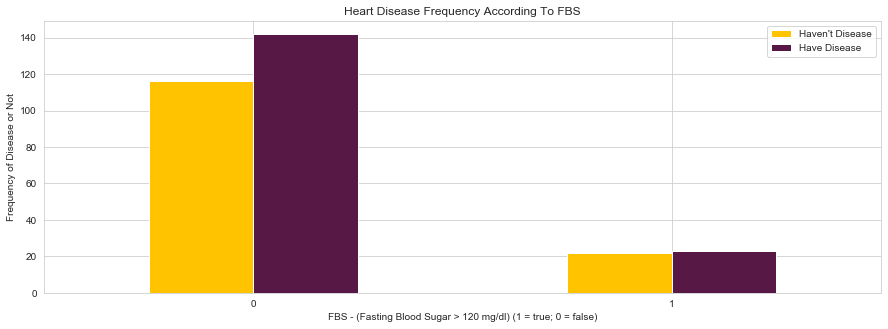

In [24]:
pd.crosstab(df.fbs,df.target).plot(kind="bar",figsize=(15,5),color=['#FFC300','#581845' ])
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

### 11. Heart Disease Frequency According To Chest Pain Type

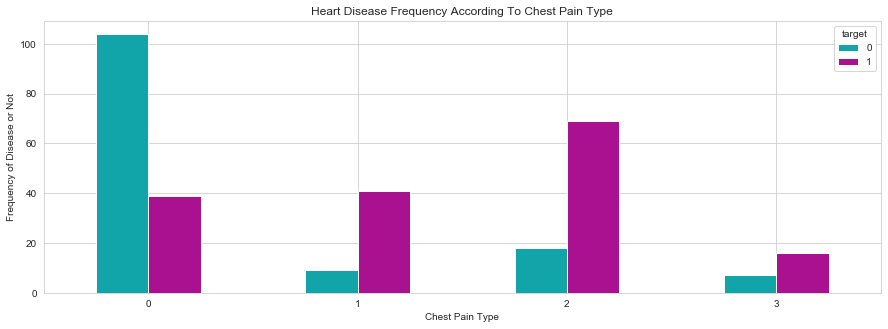

In [25]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(15,5),color=['#11A5AA','#AA1190'  ])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

## Model Building 

### Creating Dummy Variables

**Since 'cp', 'thal' and 'slope' are categorical variables we'll turn them into dummy variables.**

In [26]:
a = pd.get_dummies(df['cp'], prefix = "cp")
b = pd.get_dummies(df['thal'], prefix = "thal")
c = pd.get_dummies(df['slope'], prefix = "slope")

In [27]:
frames = [df, a, b, c]
df = pd.concat(frames, axis = 1)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,3,145,233,1,0,150,0,2.3,...,0,0,1,0,1,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,1,0,0,0,1,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,1,0,0,0,0,1,0,0,0,1
3,56,1,1,120,236,0,1,178,0,0.8,...,1,0,0,0,0,1,0,0,0,1
4,57,0,0,120,354,0,1,163,1,0.6,...,0,0,0,0,0,1,0,0,0,1


In [28]:
df = df.drop(columns = ['cp', 'thal', 'slope'])
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,...,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,...,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,...,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,...,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,...,0,0,0,0,0,1,0,0,0,1


### Splitting the Dataset

In [29]:
X = df.drop('target', axis = 1)
y =  df['target']

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
train_X , test_X , train_y , test_y = train_test_split(X, y, test_size=0.2, random_state=42)

### Preprocessing the scaling features

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(train_X)
train_X = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.transform(test_X)
test_X= pd.DataFrame(X_test_scaled)

### 1. Logistic Regression

**Implementing GridSearchCv to select best parameters and applying k-NN Algorithm.**

In [34]:
from sklearn.linear_model import LogisticRegression
# Intializing the model
logit = LogisticRegression()
# Fitting the model with X and Y values of the dataset
logit.fit(train_X, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

### Predictions and Evaluation on Test Data

In [35]:
# predictions 
pred_y = logit.predict(test_X)
# confusion matrix
from sklearn import metrics
# classes with label 1(subscribed) as row 1 and 0(not-subscribed) as row 2
cm = metrics.confusion_matrix(test_y, pred_y,[1,0])
print(cm)

[[28  4]
 [ 3 26]]


In [36]:
# classification report
print(metrics.classification_report(test_y, pred_y))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88        29
           1       0.90      0.88      0.89        32

   micro avg       0.89      0.89      0.89        61
   macro avg       0.88      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



### Reciever Operating Characterisitc Curve(ROC) and Area under ROC(AUC) Score

#### The method takes the following three parameters:

* the classification model
* test_X : X features of the test set
* test_y : actual labels of the test set

#### Returns:

* ROC AUC Score
* FPR and TPRs for different threshold values

In [37]:
def draw_roc_curve(model, test_X, test_y):
    # Creating and Initializing a results DataFrame with actual labels
    test_results_df = pd.DataFrame({'actual': test_y})
    test_results_df = test_results_df.reset_index()
    
    # predict the probabilities on the test set
    predict_proba_df = pd.DataFrame(model.predict_proba(test_X))
    
    # selecting the probabilities that the test observation belongs to class 1
    test_results_df['chd_1'] = predict_proba_df.iloc[:,1:2]
    
    # Invoke roc_curve() to return fpr, tpr and threshold values
    # Threshold values contain values from 0.0 to 1.0
    fpr, tpr, thresholds = metrics.roc_curve(test_results_df.actual,
                                            test_results_df.chd_1,
                                            drop_intermediate = 
                                            False)
    
    # Getting roc auc score by invoking metrics.roc_auc_score method
    auc_score = metrics.roc_auc_score(test_results_df.actual, test_results_df.chd_1)
    
    # Setting the size of the plot
    plt.figure(figsize = (8,6))
    # Plotting the actual fpr and tpr values
    plt.plot(fpr,tpr, label = 'ROC curve (area = %0.2f)' % auc_score)
    # Plotting the diagonal line from (0,1)
    plt.plot([0,1],[0,1],'k--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.5])
    # Setting the labels and titles
    plt.xlabel('False Positive Rate or [1-True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Reciever operating characteristic ')
    plt.legend(loc='lower right')
    plt.show()
    
    return auc_score,fpr,tpr, thresholds

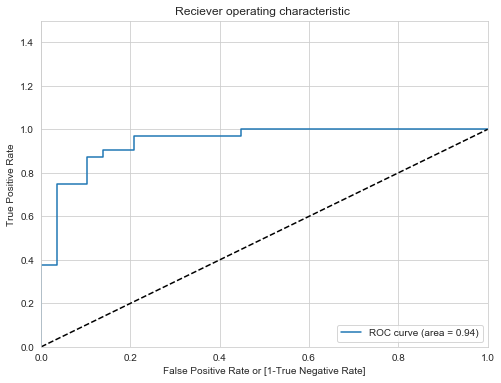

In [38]:
# Invoking the draw_roc_curve with logistic regression model
_, _, _, _ = draw_roc_curve( logit, test_X, test_y ) 

In [39]:
accuracies = {}
acc = metrics.accuracy_score(test_y,pred_y)
accuracies['Logistic Regression'] = acc
print("Accuracy of Logistic Regression {:.2f}%".format(acc))

Accuracy of Logistic Regression 0.89%


### 2. KNN Algorithm

In [40]:
# Importing the KNN classifier algorithm
from sklearn.neighbors import KNeighborsClassifier

# Initializing the classifier
knn_clf = KNeighborsClassifier()

# Fitting the model with the training set
knn_clf.fit(train_X, train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

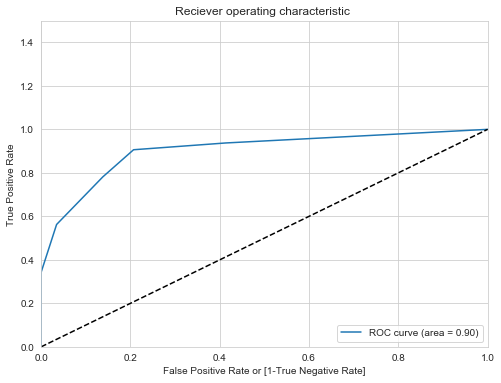

In [41]:
# Invoking the draw_roc_curve with KNN model
_, _, _, _ = draw_roc_curve( knn_clf, test_X, test_y ) 

### Predictions and Evaluations on Test Data

In [42]:
# Predicting on test set
pred_y = knn_clf.predict(test_X)
# Drawing the confusion matrix for KNN model
cm = metrics.confusion_matrix(test_y,pred_y,[1,0])
print(cm)

[[25  7]
 [ 4 25]]


In [43]:
# Accuracy
metrics.accuracy_score(test_y,pred_y)

0.819672131147541

In [44]:
# Classification report
print(metrics.classification_report(test_y,pred_y))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82        29
           1       0.86      0.78      0.82        32

   micro avg       0.82      0.82      0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



### GridSearch for Optimal Parameters

In [45]:
# Importing GridSearchCV
from sklearn.model_selection import GridSearchCV

# Creating a dictionary with hyperparameters and possible values for searching
tuned_parameters = [{'n_neighbors': range(5,10), 'metric': ['canberra','euclidean','minkowski']}]

# Configuring grid search
clf = GridSearchCV(KNeighborsClassifier(),
                  tuned_parameters,
                  cv=10,
                  scoring = 'roc_auc')

# fit the search with training set
clf.fit(train_X,train_y)

C:\Users\Vijay Lamba\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_neighbors': range(5, 10), 'metric': ['canberra', 'euclidean', 'minkowski']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [46]:
clf.best_score_

0.8858878724581205

In [47]:
clf.best_params_

{'metric': 'canberra', 'n_neighbors': 9}

### Building the Final KNN Model with Optimal Parameters

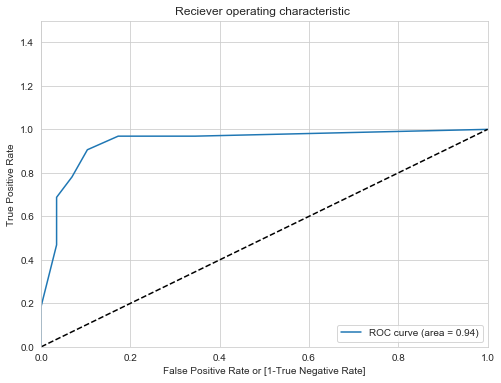

In [48]:
_, _, _, _ = draw_roc_curve( clf, test_X, test_y ) 

In [49]:
# Predicting on test set
pred_y_final = clf.predict(test_X)
# Drawing the confusion matrix for KNN model
cm = metrics.confusion_matrix(test_y,pred_y_final,[1,0])
print(cm)

[[29  3]
 [ 3 26]]


In [50]:
# Classification report
print(metrics.classification_report(test_y,pred_y_final))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        29
           1       0.91      0.91      0.91        32

   micro avg       0.90      0.90      0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



In [51]:
# Accuracy
acc = metrics.accuracy_score(test_y,pred_y_final)
accuracies['KNN'] = acc
print("Maximum KNN Score is {:.2f}%".format(acc))

Maximum KNN Score is 0.90%


### 3. Random Forest Algorithm

In [52]:
# Importing the Random Forest Classifier from the sklearn.ensemble
from sklearn.ensemble import RandomForestClassifier

#Intializing the Random Forest Classifier with max_depth and n_estimators
radm_clf = RandomForestClassifier(max_depth = 10, n_estimators = 10)
radm_clf.fit( train_X, train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

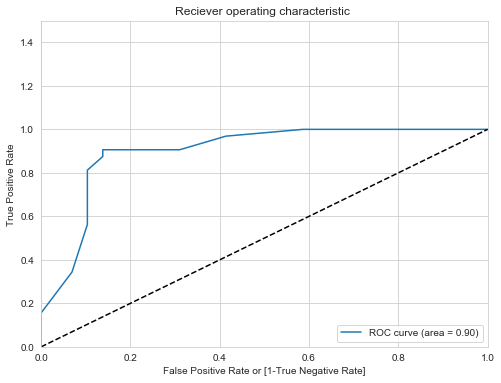

In [53]:
_, _, _, _ = draw_roc_curve( radm_clf, test_X, test_y ) 

### Grid Search for Optimal Parameters

In [54]:
# Configuring parameters and values for searched
tuned_parameters = [{'max_depth': [10,15], 'n_estimators': [10,20],'max_features':['sqrt',0.2]}]

# Initializing the RF classifier
radm_clf = RandomForestClassifier()

# Configuring search with the tunable parameters 
clf = GridSearchCV(radm_clf,
                  tuned_parameters,
                  cv = 5,
                  scoring = 'roc_auc')

# Fitting the training set
clf.fit(train_X, train_y)

C:\Users\Vijay Lamba\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'max_depth': [10, 15], 'n_estimators': [10, 20], 'max_features': ['sqrt', 0.2]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [55]:
clf.best_score_

0.8938004144615715

In [56]:
clf.best_params_

{'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 20}

### Building the Final Random Forest Model with Optimal Parameter Values

In [57]:
# Initializing the Random Forest Model with the optimal values
radm_clf = RandomForestClassifier(max_depth = 15,
                                 n_estimators = 20,
                                 max_features = 'sqrt')

# Fitting the model with the training set
radm_clf.fit( train_X, train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

### ROC AUC Score

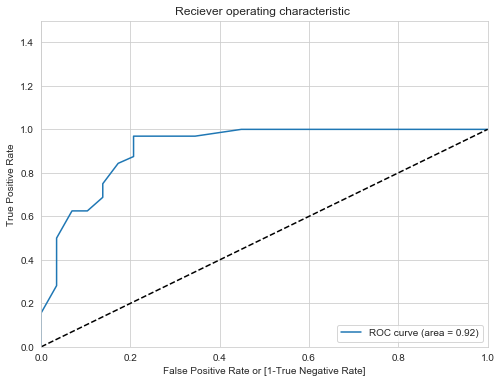

In [58]:
_, _, _, _ = draw_roc_curve(radm_clf,test_X,test_y)

### Predictions and Evaluation on Test Data

In [59]:
pred_y = radm_clf.predict( test_X )
cm = metrics.confusion_matrix( test_y, pred_y,[1,0])
print(cm)

[[24  8]
 [ 4 25]]


In [60]:
# classification report
print(metrics.classification_report(test_y, pred_y))

              precision    recall  f1-score   support

           0       0.76      0.86      0.81        29
           1       0.86      0.75      0.80        32

   micro avg       0.80      0.80      0.80        61
   macro avg       0.81      0.81      0.80        61
weighted avg       0.81      0.80      0.80        61



In [61]:
# accuracy 
acc = metrics.accuracy_score(test_y, pred_y)
accuracies['Random Forest'] = acc
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc))

Random Forest Algorithm Accuracy Score : 0.80%


### Gradient Boosting

#### We will build a model with 500 estimators and max_depth value as 100.

In [62]:
# Importing the Gradient Boosting classifier
from sklearn.ensemble import GradientBoostingClassifier

# Intializing Gradient Boosting with 500 estimators and max_depth as 10.
gboost_clf = GradientBoostingClassifier( n_estimators = 500, max_depth = 10)

# Fitting gradient boosting model to training set
gboost_clf.fit(train_X, train_y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=10,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=500,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

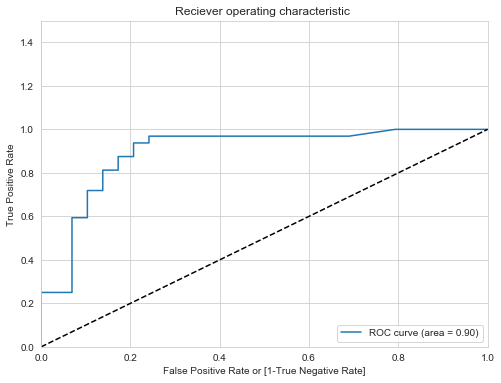

In [63]:
_, _, _, _ = draw_roc_curve(gboost_clf, test_X, test_y)

In [64]:
from sklearn.model_selection import cross_val_score

gboost_clf = GradientBoostingClassifier( n_estimators= 500, max_depth= 10)

cv_scores = cross_val_score( gboost_clf, train_X, train_y, cv = 10, scoring = 'roc_auc')

In [65]:
# fitting the model on train data
gboost_clf.fit(train_X, train_y)
# Predictions on test data
pred_y = gboost_clf.predict(test_X)
# confusion matrix
cm = metrics.confusion_matrix(test_y, pred_y,[1,0])
print(cm)

[[27  5]
 [ 5 24]]


In [66]:
# classification report
print( metrics.classification_report(test_y, pred_y))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

   micro avg       0.84      0.84      0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



In [67]:
# accuracy 
acc = metrics.accuracy_score(test_y, pred_y)
accuracies['Gradient Boosting'] = acc
print("Gradient Boosting Algorithm Accuracy Score : {:.2f}%".format(acc))

Gradient Boosting Algorithm Accuracy Score : 0.84%


### Comparing Models

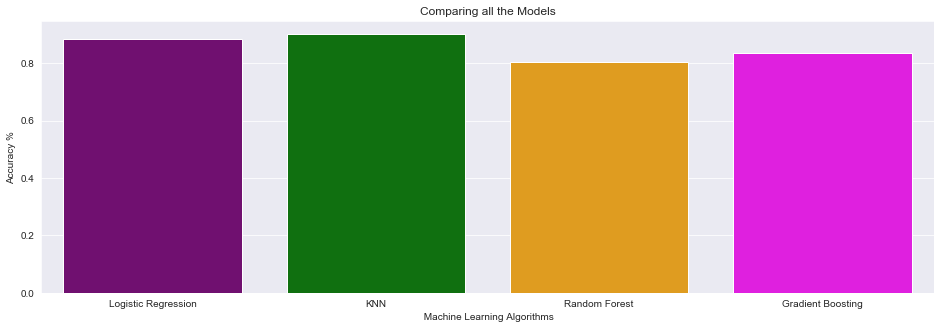

In [68]:
# Colors to each algorithm
colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE"]
# grid style
sns.set_style("darkgrid")
# figure size
plt.figure(figsize=(16,5))
# labels
plt.ylabel("Accuracy %")
plt.xlabel(" Machine Learning Algorithms")
plt.title('Comparing all the Models')
# bar plot
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

#### Our models work fine with consistency among all but the  best of them is KNN Model with High Model Performance.